In [1]:
# Importing libraries
import math  # Math library for mathematical operations
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for creating visualizations
import seaborn as sns  # Seaborn for statistical data visualization
import plotly_express as px  # Plotly Express for interactive visualizations
from sklearn.feature_extraction.text import CountVectorizer  # CountVectorizer for converting text data into numerical vectors
from sklearn.metrics.pairwise import cosine_similarity  # Cosine similarity for measuring similarity between vectors


In [2]:
# Reading the Netflix dataset from a CSV file into a pandas DataFrame
netflix_data = pd.read_csv('NetflixDataset.csv', encoding='latin-1', index_col='Title')
# Displaying the first two rows of the DataFrame
netflix_data.head(2)


,Genre,Tags,Languages,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,...,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,Summary,Series or Movie,IMDb Votes,Image
Title,,,,,,,,,,,,,,,,,,,,,
Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,...,57.0,"$21,22,065",12-Dec-08,04-03-2021,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,A med student with a supernatural gift tries t...,Series,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...
HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,5.8,...,NaN,"$70,632",08-May-20,04-03-2021,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,"When nerdy Johanna moves to London, things get...",Movie,2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...


In [3]:
# Converting the index labels to title case
netflix_data.index = netflix_data.index.str.title()


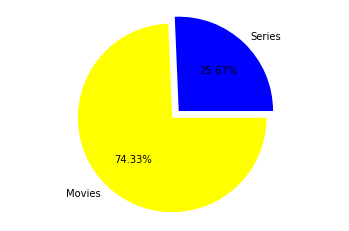

In [4]:
# Define color palette for the pie chart
color = ['blue', 'yellow']
# Define labels for the pie chart
label = ['Series', 'Movies']
# Calculate sizes of each category (Series and Movies)
sizes = [
    netflix_data[netflix_data['Series or Movie'] == 'Series'].size,
    netflix_data[netflix_data['Series or Movie'] == 'Movie'].size
]
# Define the explode parameter to separate slices (optional)
explode = (0.1, 0)

# Create a figure and axis for the pie chart
fig, ax = plt.subplots()
# Plot the pie chart with specified parameters
ax.pie(sizes, explode=explode, labels=label, colors=color, autopct='%2.2f%%')
# Set aspect ratio to be equal, ensuring a circular pie chart
ax.axis('equal')
# Display the pie chart
plt.show()


In [5]:
# Renaming the column 'View Rating' to 'ViewerRating'
netflix_data.rename(columns={'View Rating': 'ViewerRating'}, inplace=True)


In [6]:
# Extracting language information from the 'Languages' column and creating dummy variables
Language = netflix_data['Languages'].str.get_dummies(',')
# Extracting column names and converting them to a list
Lang = Language.columns.str.strip().values.tolist()
# Accessing the 'Languages' column
Language = netflix_data['Languages']
# Initializing a dictionary to store language counts
Language_Count = dict()

# Looping through each language
for i in Lang:
    # Counting the occurrences of each language in the 'Languages' column and summing them up
    p = Language.str.count(i).sum()
    # Adding the language count to the dictionary
    Language_Count[i] = int(p)

# Printing the number of unique languages
print(len(Language_Count))


184


In [7]:
# Sorting the Language_Count dictionary by values in descending order
Language_Count = {k: v for k, v in sorted(Language_Count.items(), key=lambda item: item[1], reverse=True)}

# Creating a dictionary to store the top languages and their counts
top_languages = {"Languages": list(Language_Count.keys()), "Count": list(Language_Count.values())}


In [8]:
# Creating a bar plot using Plotly Express
fig = px.bar(
    pd.DataFrame(top_languages)[:10],  # Selecting the top 10 languages and converting them to a DataFrame
    y='Languages',  # Setting the y-axis as 'Languages'
    x='Count',  # Setting the x-axis as 'Count'
    orientation='h',  # Setting the orientation to horizontal
    title='Most Available Languages',  # Setting the title of the plot
    color='Count',  # Coloring the bars based on the count of languages
    color_continuous_scale=px.colors.qualitative.Prism  # Setting the color scale
)

# Updating the y-axis to order the languages in ascending total count
fig.update_yaxes(categoryorder='total ascending')

# Displaying the plot
fig.show()


In [9]:
# Extracting genre information from the 'Genre' column and creating dummy variables
Genres = netflix_data['Genre'].str.get_dummies(',')
# Extracting column names and converting them to a list
Genre = Genres.columns.str.strip().values.tolist()
# Accessing the 'Genre' column
Genres = netflix_data['Genre']
# Initializing a dictionary to store genre counts
Genre_Count = dict()

# Looping through each genre
for i in Genre:
    # Counting the occurrences of each genre in the 'Genre' column and summing them up
    p = Genres.str.count(i).sum()
    # Adding the genre count to the dictionary
    Genre_Count[i] = int(p)

# Printing the number of unique genres
print(len(Genre_Count))


28


In [10]:
# Sorting the Genre_Count dictionary by values in descending order
Genre_Count = {k: v for k, v in sorted(Genre_Count.items(), key=lambda item: item[1], reverse=True)}

# Creating a dictionary to store the top genres and their counts
top_genres = {"Genre": list(Genre_Count.keys()), "Count": list(Genre_Count.values())}


In [11]:
# Creating a bar plot using Plotly Express
fig = px.bar(
    pd.DataFrame(top_genres)[:10],  # Selecting the top 10 genres and converting them to a DataFrame
    y='Genre',  # Setting the y-axis as 'Genre'
    x='Count',  # Setting the x-axis as 'Count'
    orientation='h',  # Setting the orientation to horizontal
    title='Genres with maximum content',  # Setting the title of the plot
    color='Count',  # Coloring the bars based on the count of genres
    color_continuous_scale=px.colors.qualitative.Prism  # Setting the color scale
)

# Updating the y-axis to order the genres in ascending total count
fig.update_yaxes(categoryorder='total ascending')

# Displaying the plot
fig.show()


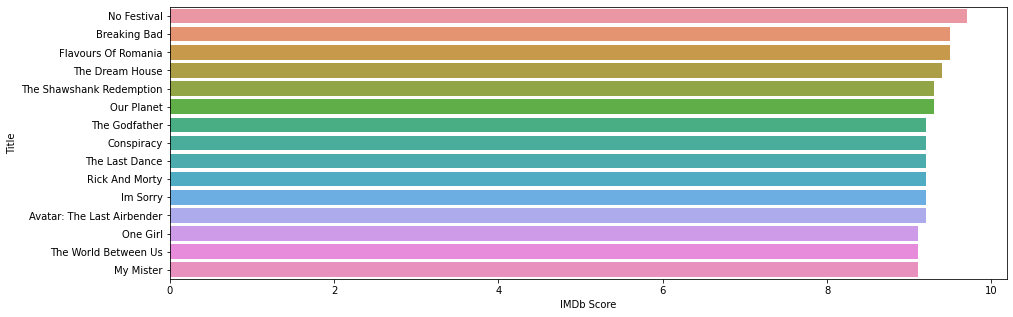

In [12]:
# Sorting the Netflix data by 'IMDb Score' in descending order and selecting the top 15 entries
top_15 = netflix_data.sort_values(by='IMDb Score', ascending=False).head(15)

# Creating a new figure with a specified size for the plot
plt.figure(figsize=(15, 5))

# Creating a bar plot using seaborn
sns.barplot(data=top_15, y=top_15.index, x="IMDb Score")

# Displaying the plot
plt.show()


In [13]:
# Removing duplicate indices from the DataFrame
netflix_data = netflix_data[~netflix_data.index.duplicated()]


In [14]:
# Checking the number of duplicated indices in the DataFrame's index
netflix_data.index.duplicated().sum()


0

In [15]:
# Checking the number of null (missing) values in the DataFrame's index
netflix_data.index.isnull().sum()


0

In [16]:
# Converting the 'Genre' column to string type
netflix_data['Genre'] = netflix_data['Genre'].astype('str')

# Counting the number of occurrences where the 'Genre' column contains the string 'nan'
print((netflix_data['Genre'] == 'nan').sum())


25


In [17]:
# Converting the 'Tags' column to string type
netflix_data['Tags'] = netflix_data['Tags'].astype('str')

# Counting the number of occurrences where the 'Tags' column contains the string 'nan'
print((netflix_data['Tags'] == 'nan').sum())


36


In [18]:
# Counting the number of occurrences where both 'Genre' and 'Tags' columns contain the string 'nan'
print(((netflix_data['Genre'] == 'nan') & (netflix_data['Tags'] == 'nan')).sum())

# Conclusion: These two features can be used to recommend movies, as no movie can be left unrecommended


0


In [19]:
# Displaying descriptive statistics for the 'IMDb Score' column
print(netflix_data[['IMDb Score']].describe())

# Finding the mode (most common value) of the 'IMDb Score' column
netflix_data['IMDb Score'].mode()

# Conclusion: This feature will be used to sort the movie or series list to represent the recommended items


        IMDb Score
count  9125.000000
mean      6.955134
std       0.896501
min       1.600000
25%       6.500000
50%       7.000000
75%       7.500000
max       9.700000


0    6.6
dtype: float64

In [20]:
# Replacing null values or zero IMDb scores with the mode value 6.6
netflix_data['IMDb Score'] = netflix_data['IMDb Score'].apply(lambda x: 6.6 if x == 0 or math.isnan(x) else x)

# Displaying descriptive statistics for the 'IMDb Score' column after replacing null values
print(netflix_data[['IMDb Score']].describe())

# Conclusion: Since no value has suffered a change greater than 0.0003 after replacing null values with the mode value, 
#            we replace the null values with 6.6


        IMDb Score
count  9132.000000
mean      6.954862
std       0.896212
min       1.600000
25%       6.500000
50%       7.000000
75%       7.500000
max       9.700000


In [21]:
# Converting the 'Actors' column to string type
netflix_data['Actors'] = netflix_data['Actors'].astype('str')

# Converting the 'ViewerRating' column to string type
netflix_data['ViewerRating'] = netflix_data['ViewerRating'].astype('str')


In [22]:
def prepare_data(x):
    """
    Function to prepare data by converting it to lowercase and removing spaces.
    
    Args:
    x (str): Input data
    
    Returns:
    str: Processed data
    """
    return str.lower(x.replace(" ", ""))


In [23]:
# List of features to select from the Netflix data
new_features = ['Genre', 'Tags', 'Actors', 'ViewerRating']

# Selecting the specified features from the Netflix data
selected_data = netflix_data[new_features]


In [24]:
# Iterating over each new feature in the list of new features
for new_feature in new_features:
    # Applying the prepare_data function to each element of the selected feature
    selected_data.loc[:, new_feature] = selected_data.loc[:, new_feature].apply(prepare_data)

# Converting index labels to lowercase and removing spaces
selected_data.index = selected_data.index.str.lower().str.replace(" ", '')

# Displaying the first two rows of the modified selected_data DataFrame
selected_data.head(2)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Genre,Tags,Actors,ViewerRating
Title,,,,
letsfightghost,"crime,drama,fantasy,horror,romance","comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r
howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r


In [25]:
def create_soup(x):
    """
    Function to create a soup of textual features for each entry.
    
    Args:
    x (Series): Input data containing 'Genre', 'Tags', 'Actors', and 'ViewerRating' columns
    
    Returns:
    str: Combined textual features (soup)
    """
    # Concatenating 'Genre', 'Tags', 'Actors', and 'ViewerRating' columns to create a soup
    return x['Genre'] + ' ' + x['Tags'] + ' ' + x['Actors'] + ' ' + x['ViewerRating']


In [26]:
# Applying the create_soup function to each row of selected_data and creating a new 'soup' column
selected_data.loc[:, 'soup'] = selected_data.apply(create_soup, axis=1)

# Displaying the first two rows of the modified selected_data DataFrame
selected_data.head(2)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Genre,Tags,Actors,ViewerRating,soup
Title,,,,,
letsfightghost,"crime,drama,fantasy,horror,romance","comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r,"crime,drama,fantasy,horror,romance comedyprogr..."
howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r,"comedy dramas,comedies,filmsbasedonbooks,briti..."


In [27]:
# Initialize CountVectorizer with English stop words
count = CountVectorizer(stop_words='english')

# Convert textual soup data into a count matrix
count_matrix = count.fit_transform(selected_data['soup'])

# Compute cosine similarity matrix using count matrix
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)


In [28]:
# Resetting the index of selected_data inplace
selected_data.reset_index(inplace=True)

# Displaying the first two rows of the modified selected_data DataFrame
selected_data.head(2)


,Title,Genre,Tags,Actors,ViewerRating,soup
0,letsfightghost,"crime,drama,fantasy,horror,romance","comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r,"crime,drama,fantasy,horror,romance comedyprogr..."
1,howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r,"comedy dramas,comedies,filmsbasedonbooks,briti..."


In [29]:
# Creating a Series where the indices are the titles and the values are the corresponding indices in selected_data
indices = pd.Series(selected_data.index, index=selected_data['Title'])

# Displaying the indices Series
indices


Title
letsfightghost                              0
howtobuildagirl                             1
thecon-heartist                             2
glebokawoda                                 3
onlyamother                                 4
                                         ... 
13goingon30                              9127
life2.0                                  9128
brandnewday                              9129
danielarends:blessuretijd                9130
dreamworkshappyholidaysfrommadagascar    9131
Length: 9132, dtype: int64

In [30]:
# Initialize a global variable 'result' to store the recommendations
result = 0

# Function to get recommendations based on title and cosine similarity matrix
def get_recommendations(title, cosine_sim):
    global result  # Accessing the global variable 'result'
    
    # Preprocess the title by removing spaces and converting to lowercase
    title = title.replace(' ', '').lower()
    
    # Get the index of the title in the indices Series
    idx = indices[title]
    
    # Get the pairwise similarity scores of all titles with the given title
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the titles based on the similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the similarity scores of the 50 most similar titles (excluding the given title itself)
    sim_scores = sim_scores[1:51]
    
    # Get the indices of the most similar titles
    movie_indices = [i[0] for i in sim_scores]
    
    # Get the details of the top 50 most similar titles from the original DataFrame
    result = netflix_data.iloc[movie_indices]
    
    # Reset the index of the result DataFrame
    result.reset_index(inplace=True)
    
    return result


In [31]:
# Create an empty DataFrame
df = pd.DataFrame()

# List of movie names
movienames = ['Annabelle Comes Home', 'The Nun', 'Insidious: The Last Key', 'Conjuring 2', 'Insidious: Chapter 3']

# List of languages
languages = ['English', 'Hindi']

# Loop through each movie name
for moviename in movienames:
    # Get recommendations for the current movie using the get_recommendations function
    get_recommendations(moviename, cosine_sim2)
    
    # Loop through each language
    for language in languages:
        # Filter the recommendations based on the current language
        filtered_results = result[result['Languages'].str.count(language) > 0]
        
        # Concatenate the filtered results with the DataFrame df
        df = pd.concat([filtered_results, df], ignore_index=True)

# Remove duplicate rows from the DataFrame
df.drop_duplicates(keep='first', inplace=True)

# Sort the DataFrame by 'IMDb Score' column in descending order
df.sort_values(by='IMDb Score', ascending=False, inplace=True)


In [32]:
# Print the shape of the DataFrame df
print(df.shape)

# Print the first few rows of the DataFrame df
print(df.head())


(118, 22)
             Title                             Genre  \
114     The Others         Horror, Mystery, Thriller   
50   The Conjuring         Horror, Mystery, Thriller   
169     Hereditary  Drama, Horror, Mystery, Thriller   
105          Split                  Horror, Thriller   
201    Conjuring 2         Horror, Mystery, Thriller   

                                                  Tags         Languages  \
114  20th Century Period Pieces,Thrillers,Mysteries...           English   
50   Horror Films,Thrillers,Supernatural Horror Fil...    English, Latin   
169  Supernatural Horror Movies,Horror Movies,Teen ...  English, Spanish   
105  Psychological Thrillers,Horror Movies,Thriller...           English   
201  Horror Films,Supernatural Horror Films,Films B...           English   

                                  Country Availability   Runtime  \
114  Italy,Sweden,Switzerland,Turkey,Iceland,India,...  1-2 hour   
50   France,Belgium,Lithuania,Switzerland,United Ki...  1-2 